# IT-542 PRML Assignment - 2

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Fixing a seed for reproducibility
np.random.seed(202011032)

## 1. Draw 200 samples each from $N(10,20)$ and $N(20,25)$. From these samples calculate sample means and sample variances. Consider these as the parameters for two new Gaussian distributions. Consider the apriori probabilities as $(0.5,0.5)$, $(0.3,0.7)$ and $(0.7,0.3)$.

In [0]:
# Drawing 200 samples each from N(10,20) and N(20,25)
x1 = np.random.normal(10, np.sqrt(20), 200)
x2 = np.random.normal(20, np.sqrt(25), 200)

# Sample means and variances of the samples taken from the two distributions
print(f"x1: Sample Mean - {np.mean(x1)}, Sample Variance - {np.var(x1)}")
print(f"x2: Sample Mean - {np.mean(x2)}, Sample Variance - {np.var(x2)}")

x1: Sample Mean - 10.048195152846455, Sample Variance - 18.46953114471191
x2: Sample Mean - 19.86240714192826, Sample Variance - 21.867050509141144


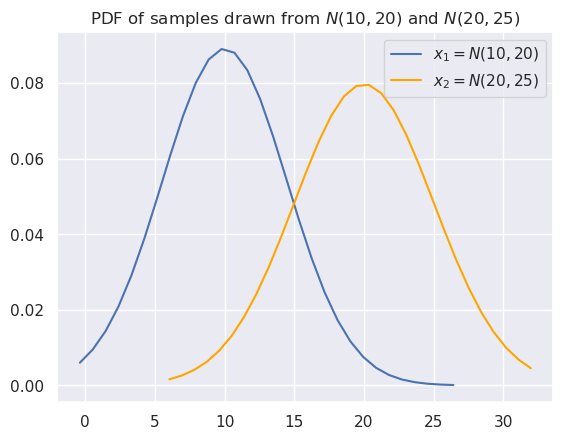

In [0]:
# bins = np.linspace(-10, 10, 30)
bins = 30
histogram_x1, bins_x1 = np.histogram(x1, bins=bins, density=True)
bin_centers_x1 = 0.5*(bins_x1[1:] + bins_x1[:-1])  # Convert bin edges to centers

histogram_x2, bins_x2 = np.histogram(x2, bins=bins, density=True)
bin_centers_x2 = 0.5*(bins_x2[1:] + bins_x2[:-1])

# Compute the PDF on the bin centers
def get_uninorm_pdf(x_list, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( -(x_list - mu)**2 / (2 * sigma**2) )

pdf_x1 = get_uninorm_pdf(bin_centers_x1, 10, np.sqrt(20))
pdf_x2 = get_uninorm_pdf(bin_centers_x2, 20, np.sqrt(25))

plt.plot(bin_centers_x1, pdf_x1, label='$x_1 = N(10,20)$')
plt.plot(bin_centers_x2, pdf_x2, color='orange', label='$x_2 = N(20,25)$')
plt.title("PDF of samples drawn from $N(10,20)$ and $N(20,25)$")
plt.legend()
plt.show()

## Draw 40 random numbers from $[5,20]$. Classify each of these random numbers as sample from one of the two Gaussian distributions obtained from samples using three sets of apriori probabilities.

In [0]:
# Drawing 40 samples from [5,20]
x_uniform_40 = np.random.uniform(5, 20, 40)

# List of tuples of apriori probabilities
apriori_probs = [(0.5, 0.5), (0.3, 0.7), (0.7, 0.3)]

In [0]:
# Calculate conditional probabilities p1(x), p2(x) for each x and classify using Bayes Decision Rule
# Classifications is a nested list of list of tuples where each list of tuples belongs to different apriori probs
# in the order as specified in the list
# Class-0: N(10,20) distribution, Class-1: N(20,25) distribution
classifications = {apriori_probs[0]: [], apriori_probs[1]: [], apriori_probs[2]: []}

for a_prob in apriori_probs:
    P1, P2 = a_prob

    for x in x_uniform_40:
        p1_x = get_uninorm_pdf(x, 10, np.sqrt(20))
        p2_x = get_uninorm_pdf(x, 20, np.sqrt(25))

        if P1 * p1_x >= P2 * p2_x:
            # Classify as of class-0
            classifications[a_prob].append((x, 0))
        else:
            # Classify as of class-1
            classifications[a_prob].append((x, 1))

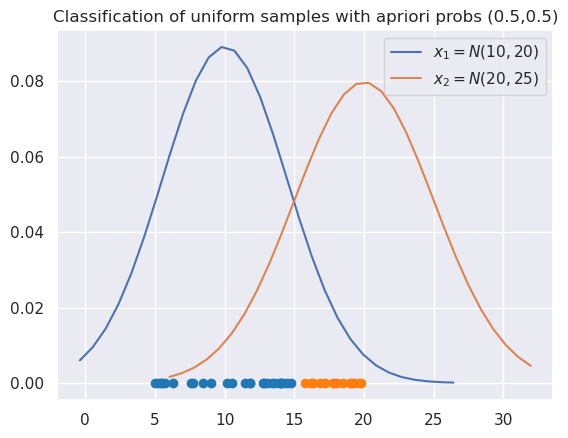

In [0]:
import pandas as pd
c_dict = {0: '#1f77b4', 1: '#ff7f0e'}

# For apriori probs (0.5,0.5)
df = pd.DataFrame(classifications[apriori_probs[0]], columns=['X', 'Category'])
groups = df.groupby('Category')

plt.plot(bin_centers_x1, pdf_x1, label='$x_1 = N(10,20)$')
plt.plot(bin_centers_x2, pdf_x2, label='$x_2 = N(20,25)$')
plt.title("Classification of uniform samples with apriori probs (0.5,0.5)")
for name, group in groups:
    plt.plot(group["X"], [0]*len(group["X"]), marker="o", linestyle="", c=c_dict[name])
plt.legend()
plt.show()

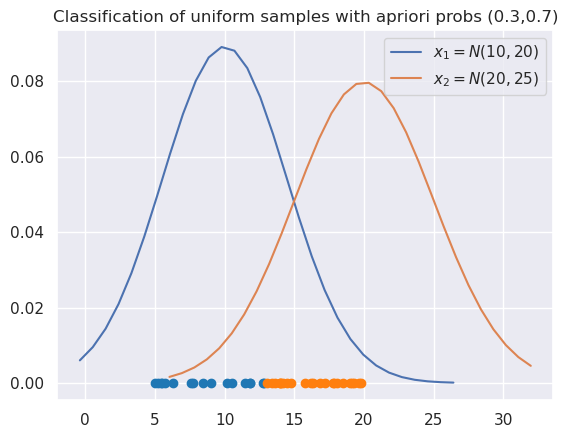

In [0]:
# For apriori probs (0.3,0.7)
df = pd.DataFrame(classifications[apriori_probs[1]], columns=['X', 'Category'])
groups = df.groupby('Category')

plt.plot(bin_centers_x1, pdf_x1, label='$x_1 = N(10,20)$')
plt.plot(bin_centers_x2, pdf_x2, label='$x_2 = N(20,25)$')
plt.title("Classification of uniform samples with apriori probs (0.3,0.7)")
for name, group in groups:
    plt.plot(group["X"], [0]*len(group["X"]), marker="o", linestyle="", c=c_dict[name])
plt.legend()
plt.show()

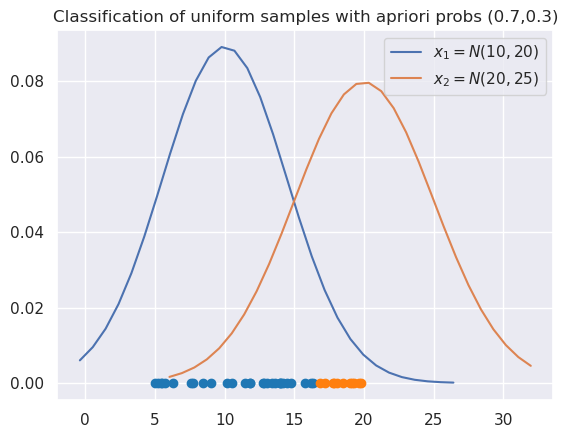

In [0]:
# For apriori probs (0.7,0.3)
df = pd.DataFrame(classifications[apriori_probs[2]], columns=['X', 'Category'])
groups = df.groupby('Category')

plt.plot(bin_centers_x1, pdf_x1, label='$x_1 = N(10,20)$')
plt.plot(bin_centers_x2, pdf_x2, label='$x_2 = N(20,25)$')
plt.title("Classification of uniform samples with apriori probs (0.7,0.3)")
for name, group in groups:
    plt.plot(group["X"], [0]*len(group["X"]), marker="o", linestyle="", c=c_dict[name])
plt.legend()
plt.show()

## 2. Split the IRIS dataset into two parts - 40 samples from the each class (randomly picked) and 10 samples from each class. (120 samples + 30 samples).
## Now treat those 120 samples as distributions and  find apriori probabilities for each class/ distribution. Based on the apriori probabilities obtained, consider those 30 samples and see which class they belong to. Compare with the ground truth.

In [0]:
# Import and load iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [0]:
# Split the dataset
x, y = iris.data, iris.target
x0 = x[y == 0]
x1 = x[y == 1]
x2 = x[y == 2]

# Randomly choose 40 samples from each of the data
np.random.seed(202011032)
x0_ind = np.random.choice(x0.shape[0], 40, replace=False)
x0_ind_test = list(set(range(x0.shape[0])) - set(x0_ind))
x0_train = x0[x0_ind, :]
x0_test = x0[x0_ind_test, :]

x1_ind = np.random.choice(x1.shape[0], 40, replace=False)
x1_ind_test = list(set(range(x1.shape[0])) - set(x1_ind))
x1_train = x1[x1_ind, :]
x1_test = x1[x1_ind_test, :]

x2_ind = np.random.choice(x2.shape[0], 40, replace=False)
x2_ind_test = list(set(range(x2.shape[0])) - set(x2_ind))
x2_train = x2[x2_ind, :]
x2_test = x2[x2_ind_test, :]

In [0]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

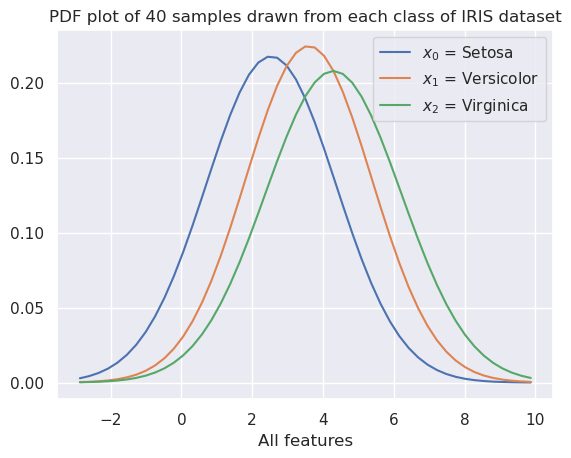

In [0]:
bins = np.linspace(-3, 10, 50)

histogram_x0, bins_x0 = np.histogram(x0_train, bins=bins, density=True)
bin_centers_x0 = 0.5*(bins_x0[1:] + bins_x0[:-1])  # Convert bin edges to centers

histogram_x1, bins_x1 = np.histogram(x1_train, bins=bins, density=True)
bin_centers_x1 = 0.5*(bins_x1[1:] + bins_x1[:-1])

histogram_x2, bins_x2 = np.histogram(x2_train, bins=bins, density=True)
bin_centers_x2 = 0.5*(bins_x2[1:] + bins_x2[:-1])

pdf_x0 = get_uninorm_pdf(bin_centers_x0, np.mean(x0_train), np.sqrt(np.var(x0_train)))
pdf_x1 = get_uninorm_pdf(bin_centers_x1, np.mean(x1_train), np.sqrt(np.var(x1_train)))
pdf_x2 = get_uninorm_pdf(bin_centers_x2, np.mean(x2_train), np.sqrt(np.var(x2_train)))

plt.plot(bin_centers_x0, pdf_x0, label='$x_0$ = Setosa')
plt.plot(bin_centers_x1, pdf_x1, label='$x_1$ = Versicolor')
plt.plot(bin_centers_x2, pdf_x2, label='$x_2$ = Virginica')
plt.xlabel("All features")
plt.title("PDF plot of 40 samples drawn from each class of IRIS dataset")
plt.legend()
plt.show()

### Estimating apriori probabilities from the 120 samples and applying Bayes Decision Rule to classify the 30 test samples using the estimated apriori and conditional probabilities

In [0]:
# Calculate apriori probabilities for each distribution
# 0 - Setosa, 1 - Versicolor, 2 - Virginica
num_train_samples = x0_train.shape[0] + x1_train.shape[0] + x2_train.shape[0]
P0_train = x0.shape[0] / num_train_samples
P1_train = x1.shape[0] / num_train_samples
P2_train = x2.shape[0] / num_train_samples

# Classify test samples using the estimated apriori and conditional probabilities
iris_test_df = pd.DataFrame(columns=["X", "Target", "Ground Truth"])
x_test = np.vstack((x0_test, x1_test, x2_test))
x0_mean_train = np.array([np.mean(x0_train[:, 0]), np.mean(x0_train[:, 1]), np.mean(x0_train[:, 2]), np.mean(x0_train[:, 3])])
x1_mean_train = np.array([np.mean(x1_train[:, 0]), np.mean(x1_train[:, 1]), np.mean(x1_train[:, 2]), np.mean(x1_train[:, 3])])
x2_mean_train = np.array([np.mean(x2_train[:, 0]), np.mean(x2_train[:, 1]), np.mean(x2_train[:, 2]), np.mean(x2_train[:, 3])])

x0_cov_train = np.cov(x0_train, rowvar=False)
x1_cov_train = np.cov(x1_train, rowvar=False)
x2_cov_train = np.cov(x2_train, rowvar=False)

from scipy.stats import multivariate_normal
x0_train_rv = multivariate_normal(mean=x0_mean_train, cov=x0_cov_train)
x1_train_rv = multivariate_normal(mean=x1_mean_train, cov=x1_cov_train)
x2_train_rv = multivariate_normal(mean=x2_mean_train, cov=x2_cov_train)


for i, x_t in enumerate(x_test):
    p0_x = x0_train_rv.pdf(x_t)
    p1_x = x1_train_rv.pdf(x_t)
    p2_x = x2_train_rv.pdf(x_t)

    # Set groundtruth for the sample
    if i < 10: x_gt = 0
    elif i < 20: x_gt = 1
    else: x_gt = 2

    if P0_train * p0_x >= P1_train * p1_x:
        if P0_train * p0_x >= P2_train * p2_x:
            iris_test_df.loc[i] = [x_t, 0, x_gt]
        else:
            iris_test_df.loc[i] = [x_t, 2, x_gt]
    elif P1_train * p1_x >= P2_train * p2_x:
        iris_test_df.loc[i] = [x_t, 1, x_gt]
    else:
        iris_test_df.loc[i] = [x_t, 2, x_gt]

In [0]:
print(iris_test_df)

                       X Target Ground Truth
0   [5.1, 3.5, 1.4, 0.2]      0            0
1   [4.8, 3.0, 1.4, 0.1]      0            0
2   [4.3, 3.0, 1.1, 0.1]      0            0
3   [5.1, 3.8, 1.6, 0.2]      0            0
4   [5.7, 4.4, 1.5, 0.4]      0            0
5   [5.4, 3.4, 1.7, 0.2]      0            0
6   [4.6, 3.6, 1.0, 0.2]      0            0
7   [5.0, 3.4, 1.6, 0.4]      0            0
8   [5.2, 3.5, 1.5, 0.2]      0            0
9   [5.2, 3.4, 1.4, 0.2]      0            0
10  [6.4, 3.2, 4.5, 1.5]      1            1
11  [5.5, 2.3, 4.0, 1.3]      1            1
12  [5.6, 3.0, 4.1, 1.3]      1            1
13  [5.2, 2.7, 3.9, 1.4]      1            1
14  [5.8, 2.6, 4.0, 1.2]      1            1
15  [6.1, 2.9, 4.7, 1.4]      1            1
16  [5.6, 2.9, 3.6, 1.3]      1            1
17  [6.7, 3.1, 4.4, 1.4]      1            1
18  [5.1, 2.5, 3.0, 1.1]      1            1
19  [5.7, 2.8, 4.1, 1.3]      1            1
20  [5.8, 2.7, 5.1, 1.9]      2            2
21  [7.1, 

In [0]:
iris_test_df["Correct"] = iris_test_df["Target"] == iris_test_df["Ground Truth"]
print(iris_test_df)

                       X Target Ground Truth  Correct
0   [5.1, 3.5, 1.4, 0.2]      0            0     True
1   [4.8, 3.0, 1.4, 0.1]      0            0     True
2   [4.3, 3.0, 1.1, 0.1]      0            0     True
3   [5.1, 3.8, 1.6, 0.2]      0            0     True
4   [5.7, 4.4, 1.5, 0.4]      0            0     True
5   [5.4, 3.4, 1.7, 0.2]      0            0     True
6   [4.6, 3.6, 1.0, 0.2]      0            0     True
7   [5.0, 3.4, 1.6, 0.4]      0            0     True
8   [5.2, 3.5, 1.5, 0.2]      0            0     True
9   [5.2, 3.4, 1.4, 0.2]      0            0     True
10  [6.4, 3.2, 4.5, 1.5]      1            1     True
11  [5.5, 2.3, 4.0, 1.3]      1            1     True
12  [5.6, 3.0, 4.1, 1.3]      1            1     True
13  [5.2, 2.7, 3.9, 1.4]      1            1     True
14  [5.8, 2.6, 4.0, 1.2]      1            1     True
15  [6.1, 2.9, 4.7, 1.4]      1            1     True
16  [5.6, 2.9, 3.6, 1.3]      1            1     True
17  [6.7, 3.1, 4.4, 1.4]    

### Calculating accuracy and misclassification percentage for the classification of test samples

In [0]:
# Calculate accuracy and misclassification error
tot_samples = len(iris_test_df)
tot_correct = len(iris_test_df["Correct"][iris_test_df["Correct"] == True])
tot_incorrect = len(iris_test_df["Correct"][iris_test_df["Correct"] == False])

accuracy = tot_correct * 100 / tot_samples
misclassified = tot_incorrect * 100 / tot_samples

print("For estimating classes for 30 test samples of IRIS dataset:")
print(f"Accuracy - {accuracy:0.4}%")
print(f"Misclassified - {misclassified:0.3}%")

For estimating classes for 30 test samples of IRIS dataset:
Accuracy - 96.67%
Misclassified - 3.33%


### As we can see in the output:
### Accuracy - 96.67%
### Misclassification - 3.33%
### Out of the 30 test samples, 29 were correctly classified and 1 samples was misclassified.